In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt



Parameterliste festlegen:

In [2]:
timesteps = 1500
dim = [1,2,3,4,6,8,12] #S2
# dim = [1,2,3,6,9]   #S1
# dens =  [0.3, 0.5, 0.7, 0.3, 0.5, 0.7]
dens = 1

#rb = [0.02, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
birthrate = [1]
rc = [22,10,6,4,2,1,0]  #S2
# rc = [16,7,4,1,0]  #S1
deathrate = 0.02


Schleife um Paraliste abzuarbeiten:

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


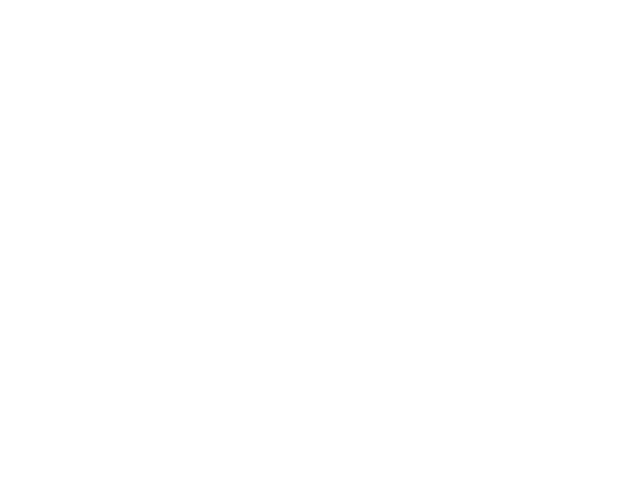

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


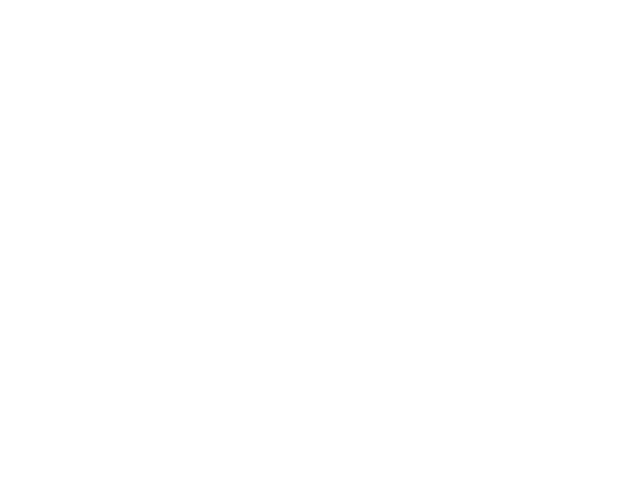

Homogeneity since k =  914


<IPython.core.display.Javascript object>


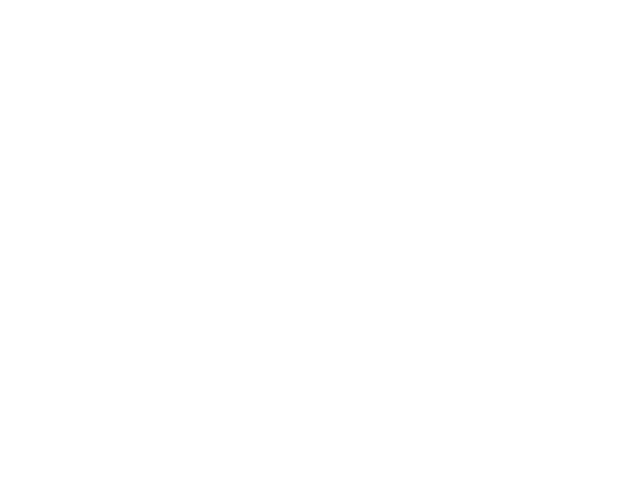

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


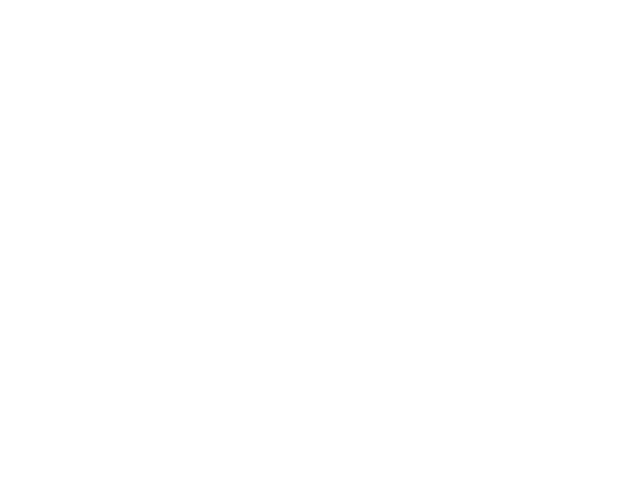

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


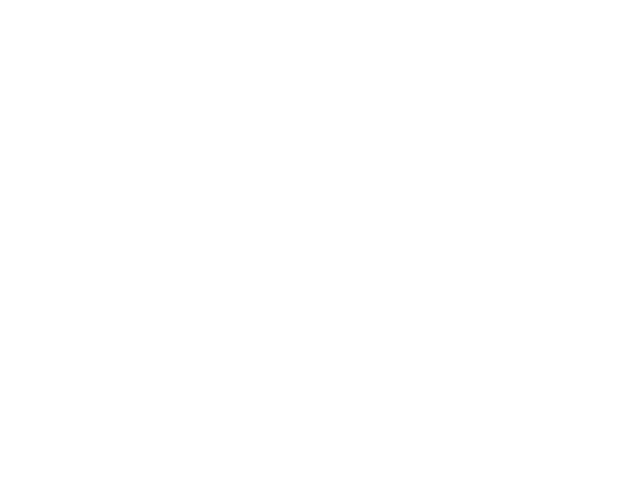

Homogeneity since k =  666


<IPython.core.display.Javascript object>


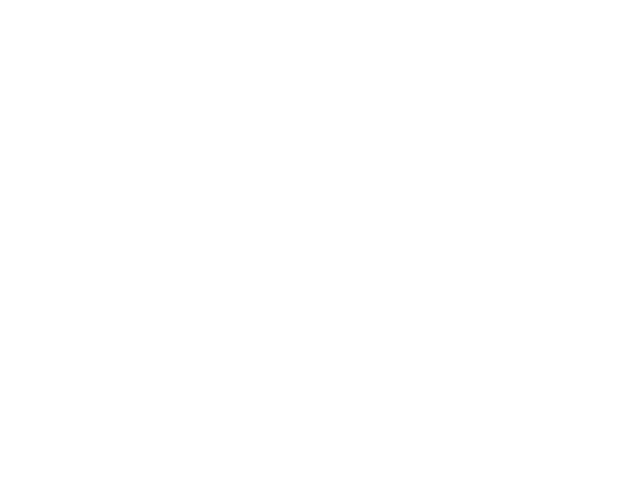

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


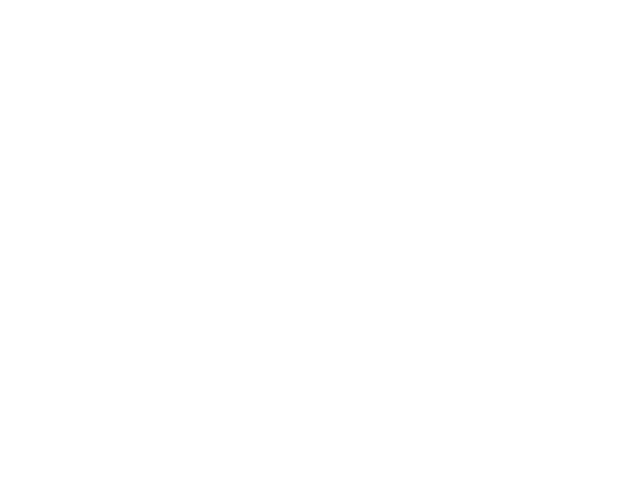

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


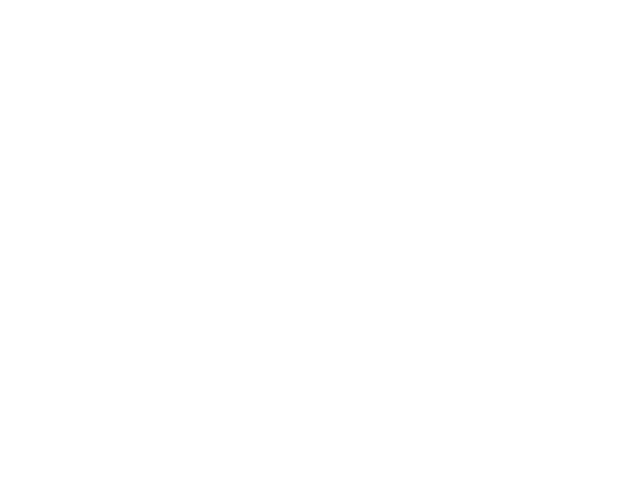

Homogeneity since k =  793


<IPython.core.display.Javascript object>


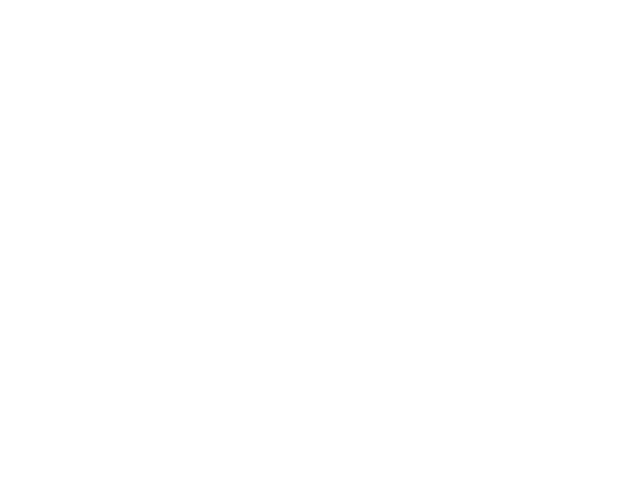

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


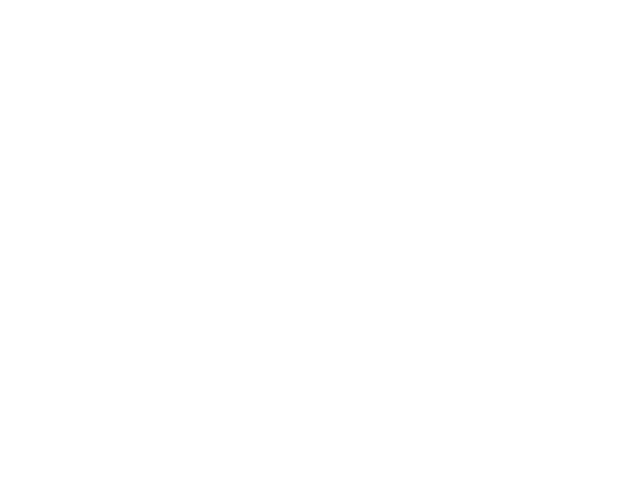

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


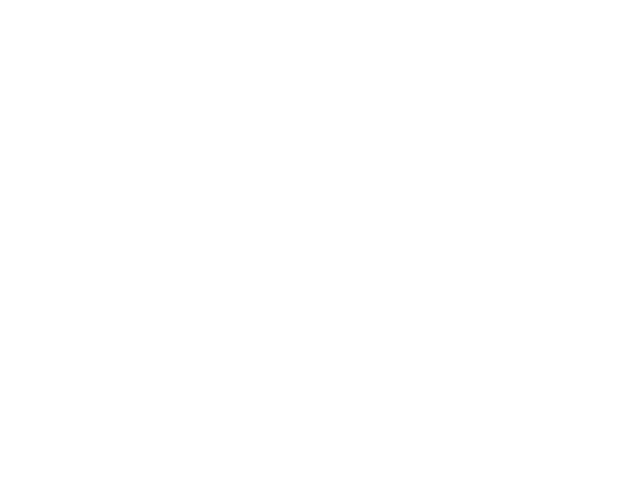

Homogeneity since k =  906


<IPython.core.display.Javascript object>


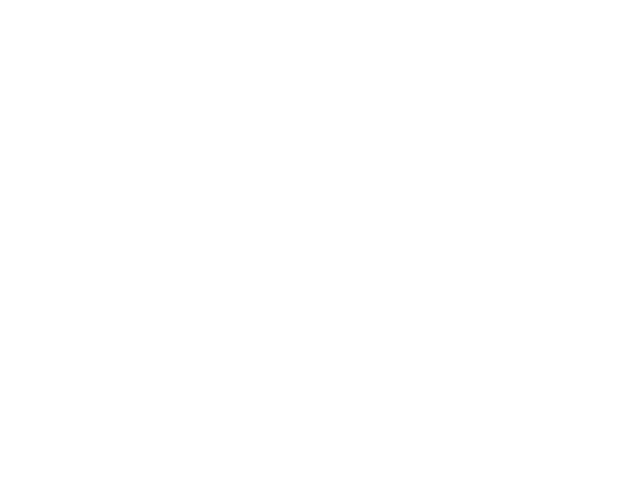

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


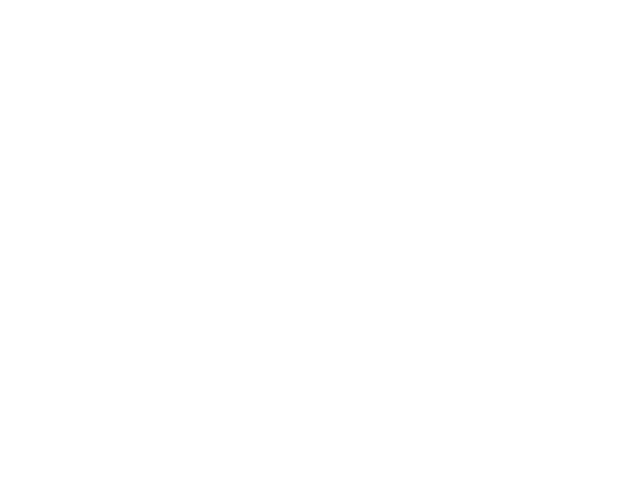

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


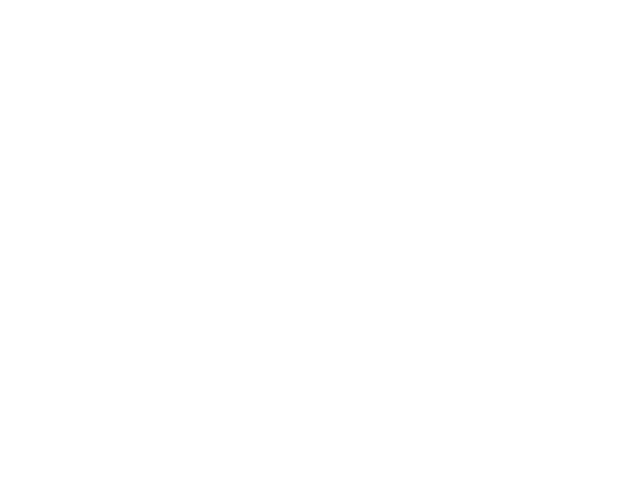

Homogeneity since k =  651


<IPython.core.display.Javascript object>


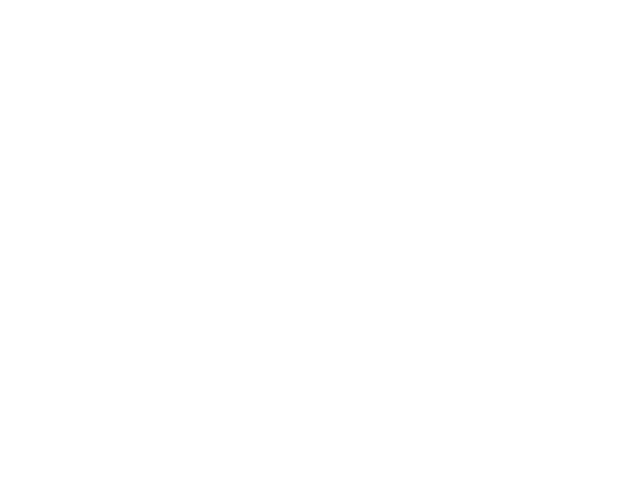

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


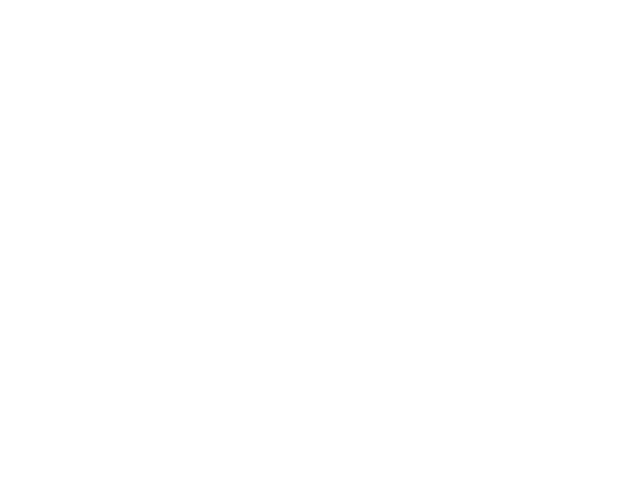

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


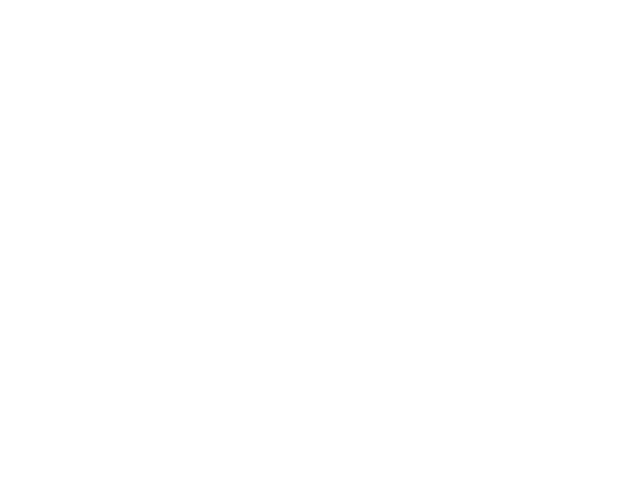

Homogeneity since k =  385


<IPython.core.display.Javascript object>


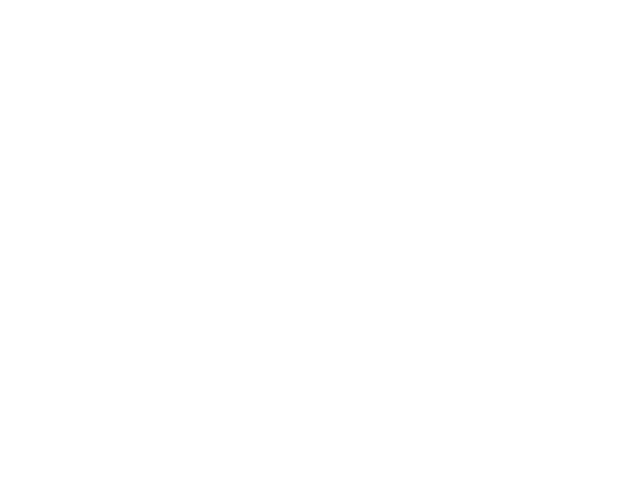

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


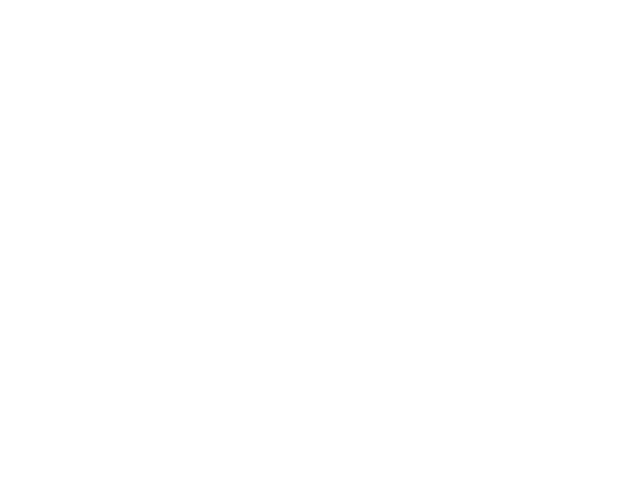

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


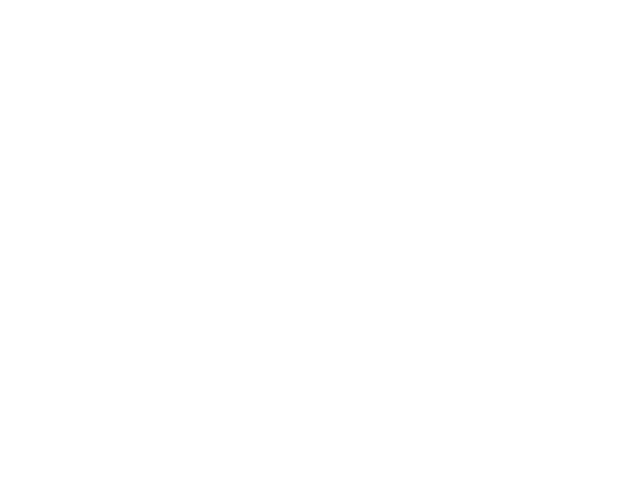

Homogeneity since k =  900


<IPython.core.display.Javascript object>


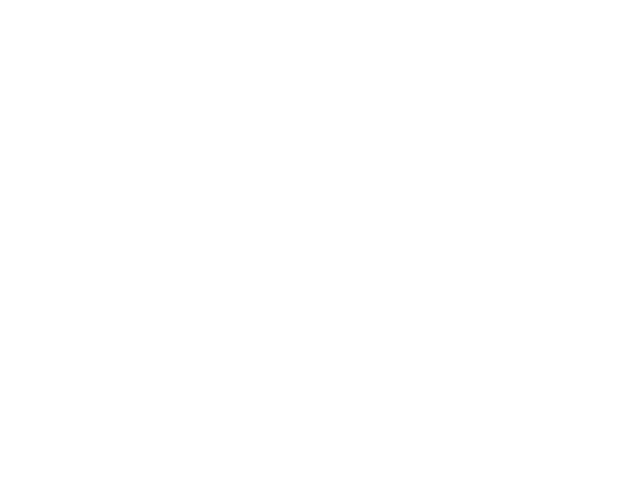

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


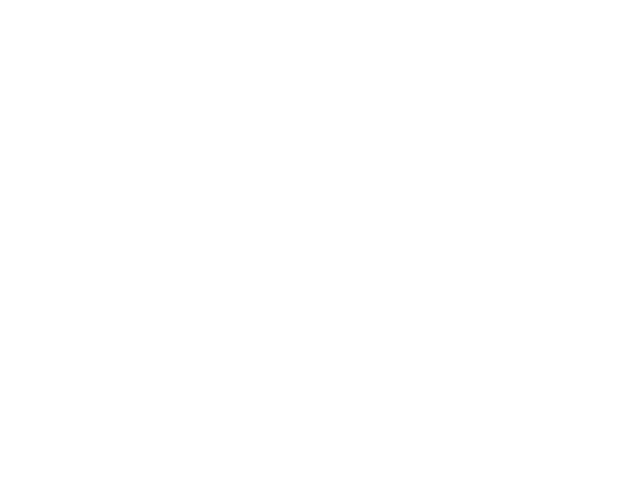

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


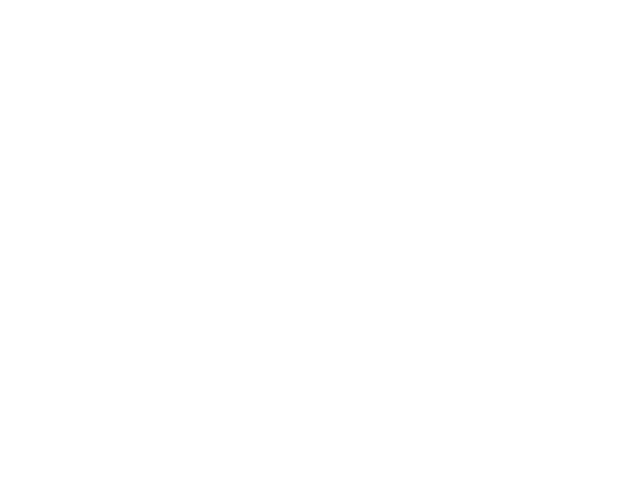

Homogeneity since k =  426


<IPython.core.display.Javascript object>


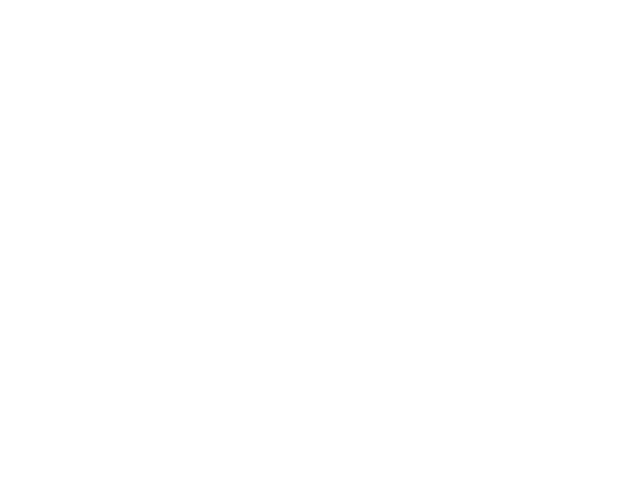

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


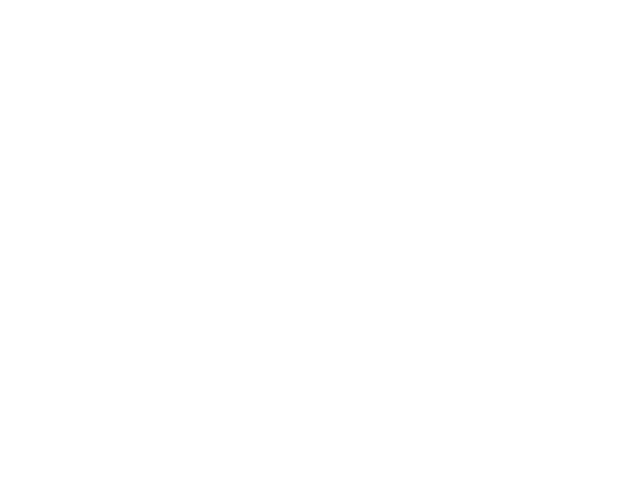

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


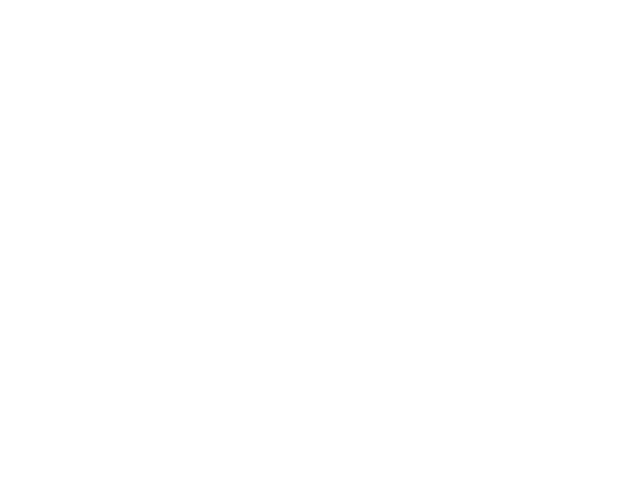

Homogeneity since k =  771


<IPython.core.display.Javascript object>


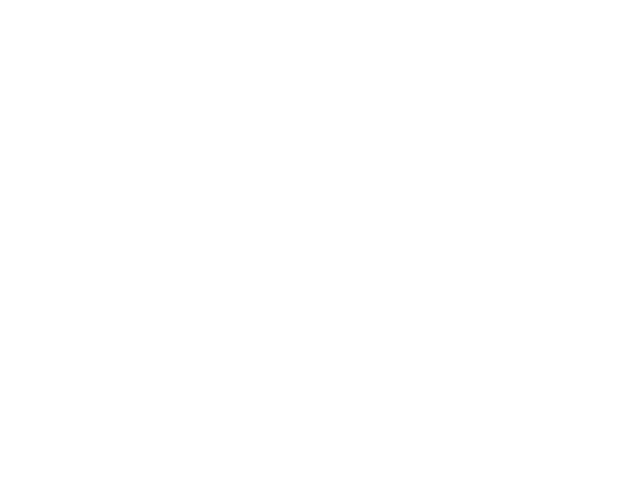

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


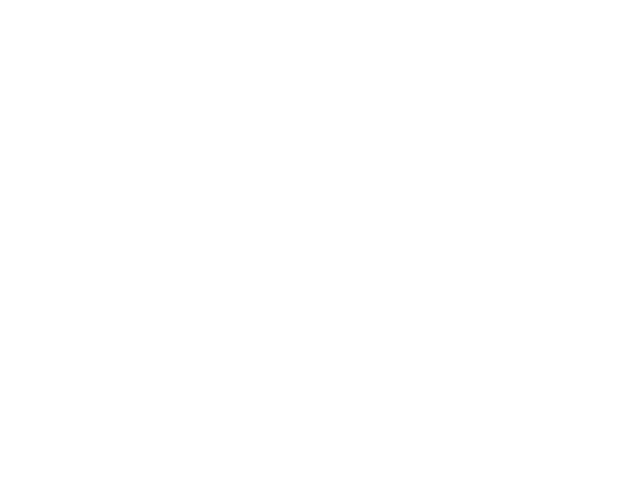

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04545455 0.04545455 ... 0.04545455 0.04545455 0.04545455]
 [0.         0.04347826 0.08695652 ... 0.04347826 0.04347826 0.04347826]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


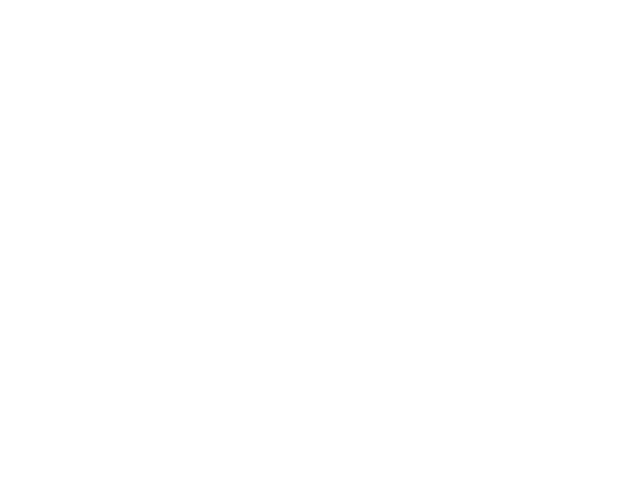

Homogeneity since k =  853


<IPython.core.display.Javascript object>


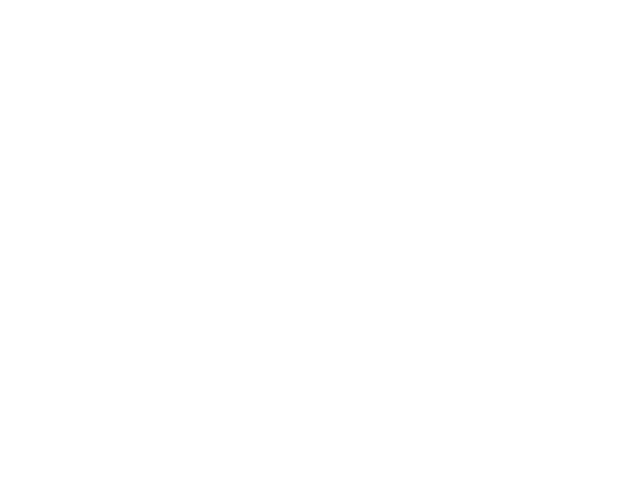

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


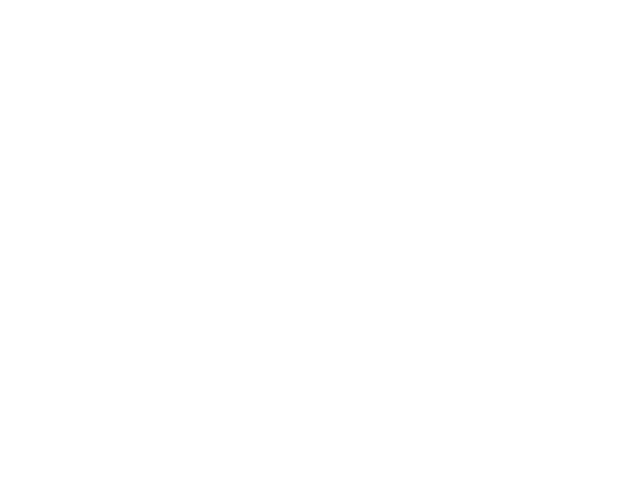

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


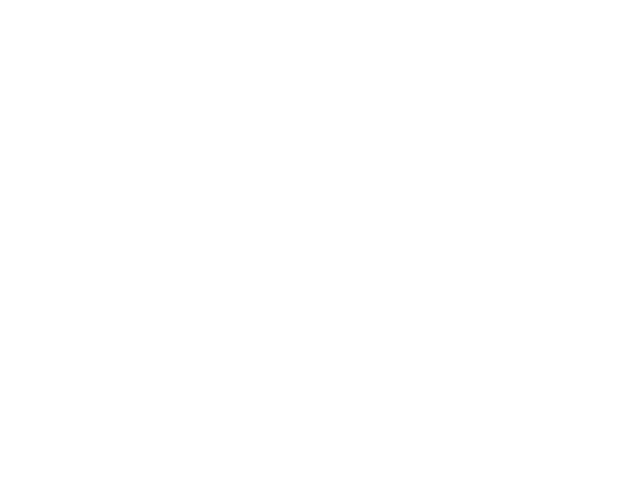

<IPython.core.display.Javascript object>


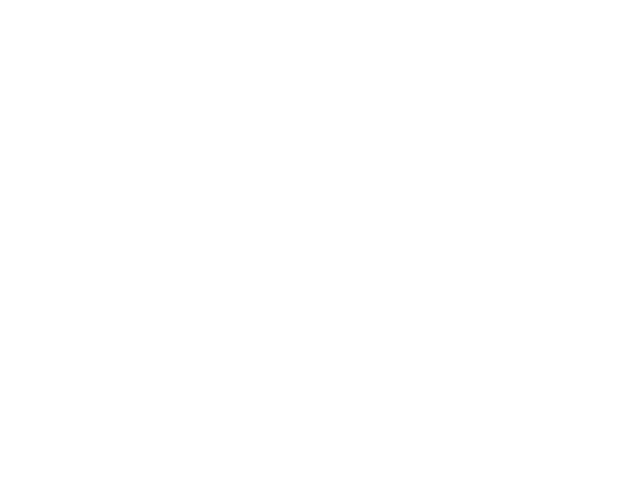

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


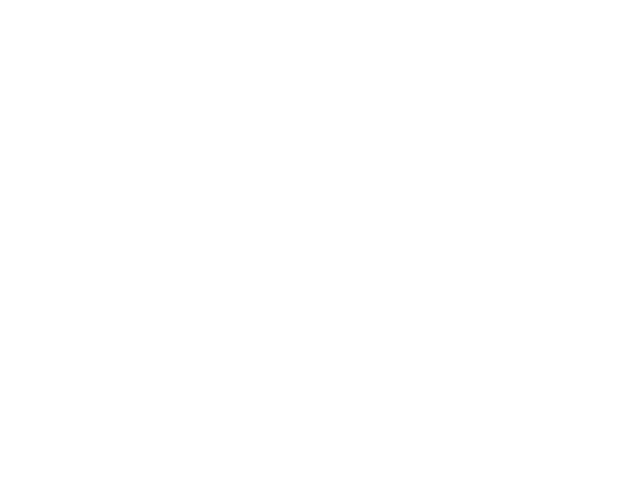

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


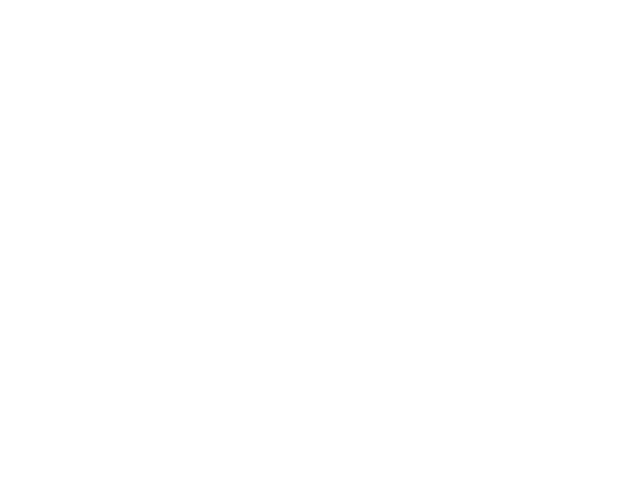

Homogeneity since k =  681


<IPython.core.display.Javascript object>


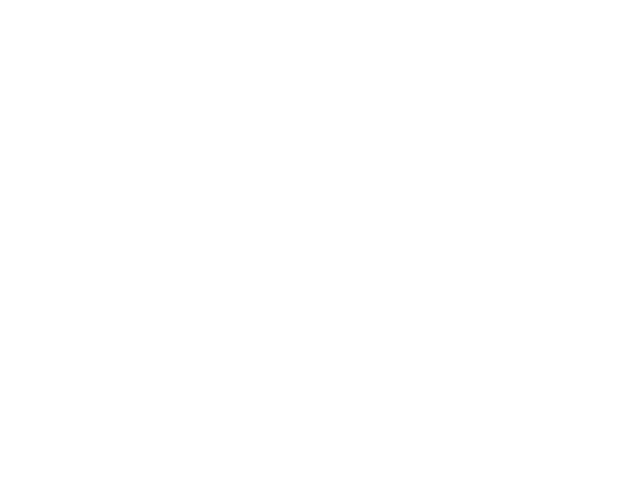

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


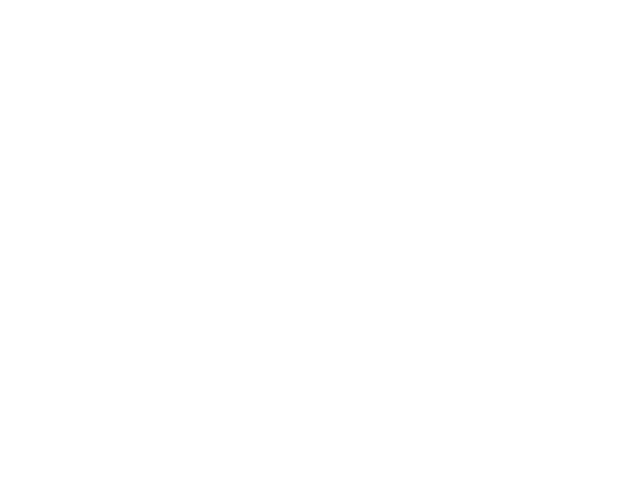

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
 ...
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


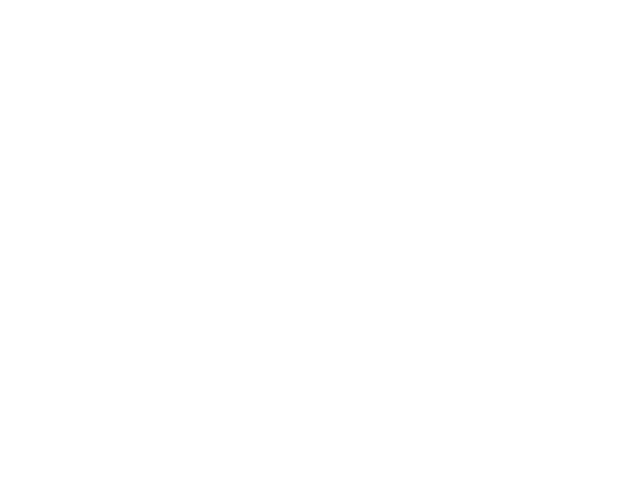

Homogeneity since k =  1366


<IPython.core.display.Javascript object>


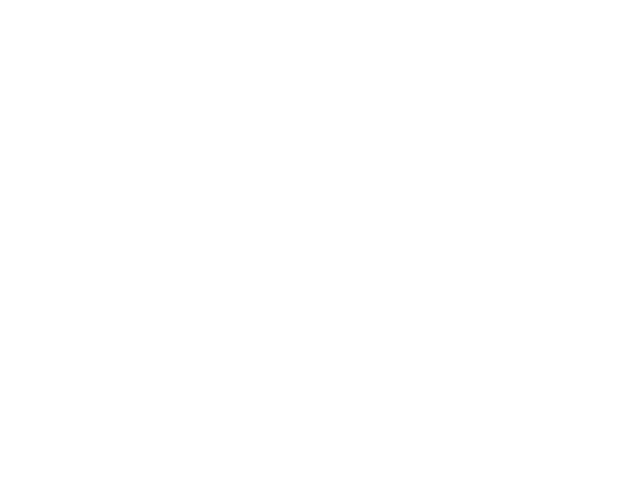

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


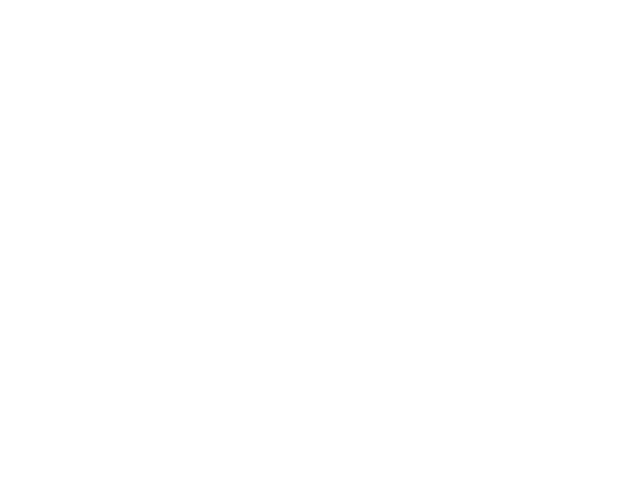

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


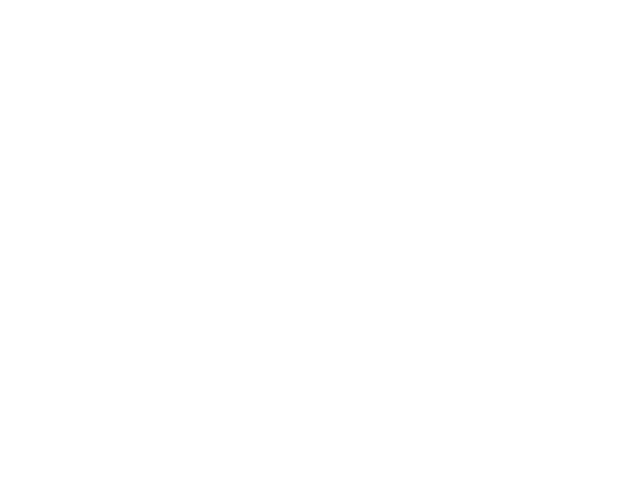

Homogeneity since k =  1370


<IPython.core.display.Javascript object>


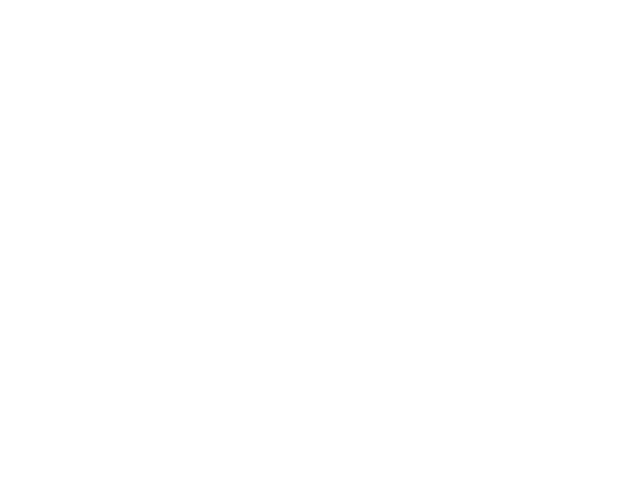

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


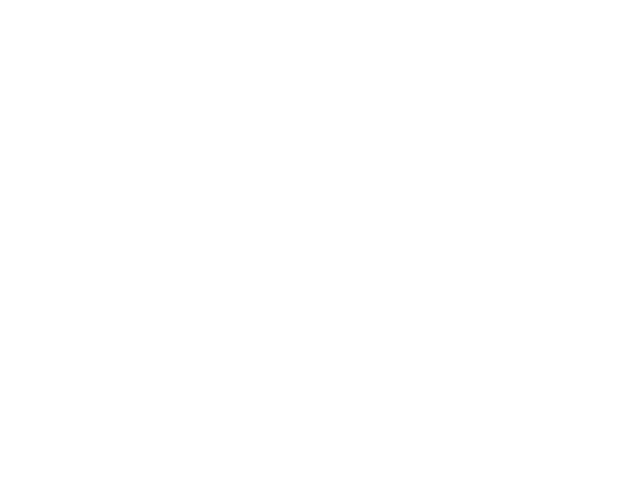

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


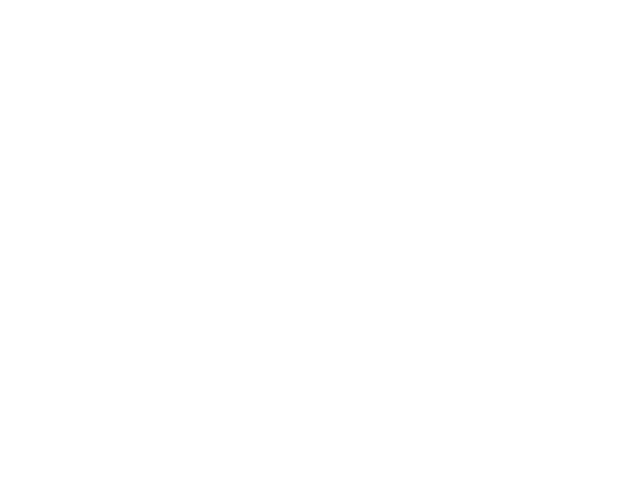

Homogeneity since k =  1348


<IPython.core.display.Javascript object>


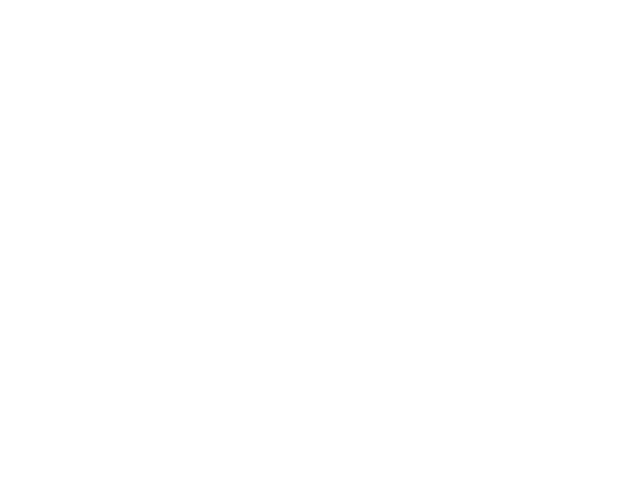

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


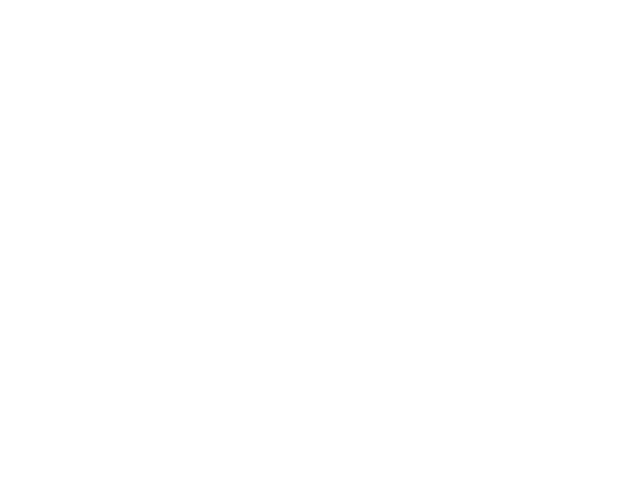

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


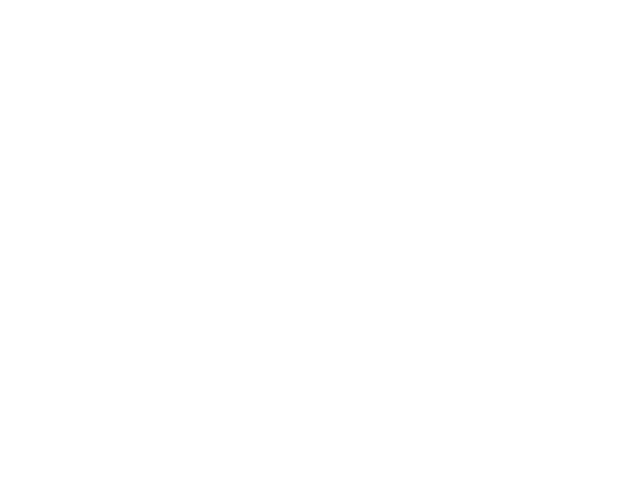

Homogeneity since k =  524


<IPython.core.display.Javascript object>


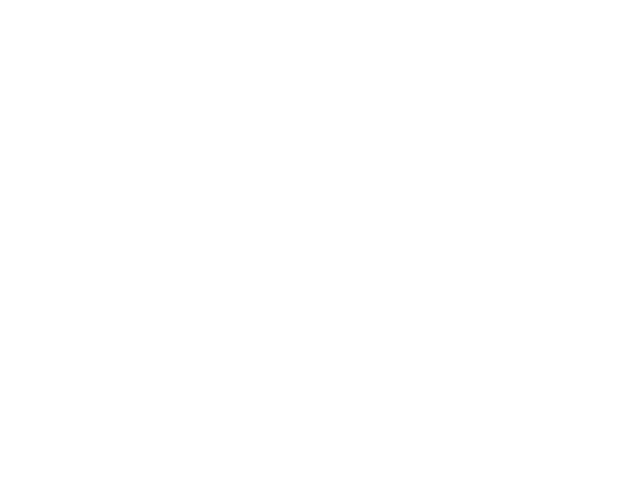

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


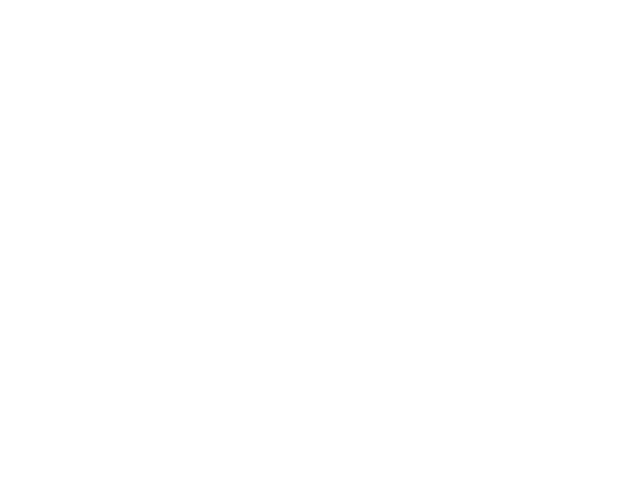

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
 [0.         0.04166667 0.08333333 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


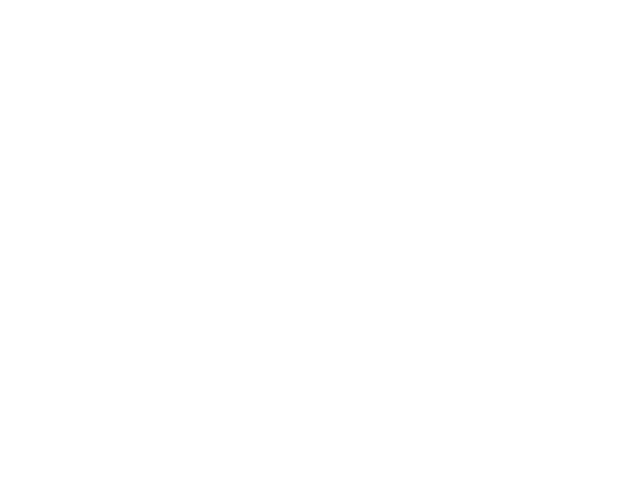

<IPython.core.display.Javascript object>


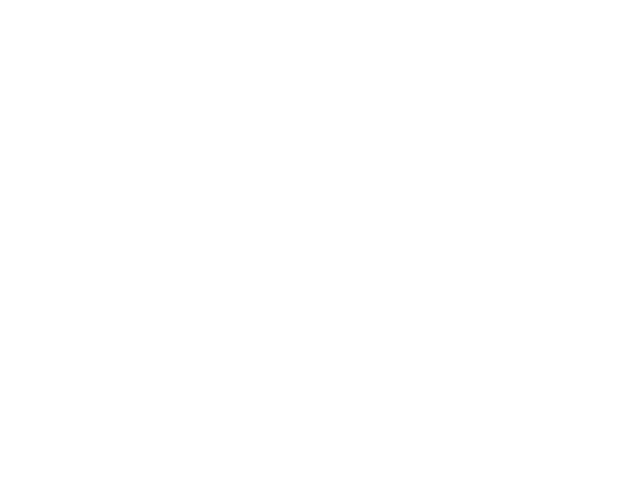

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


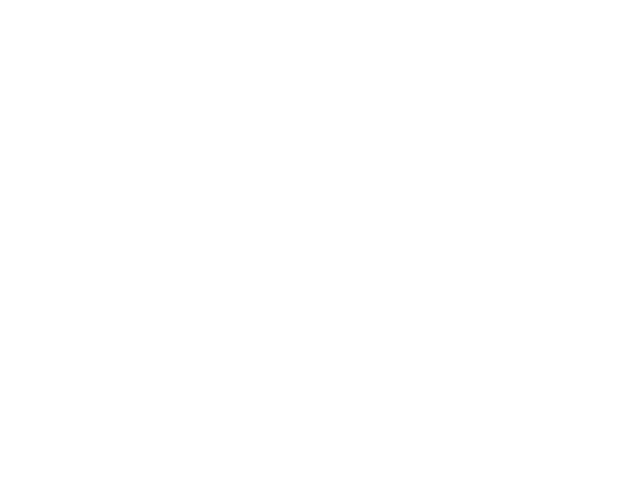

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


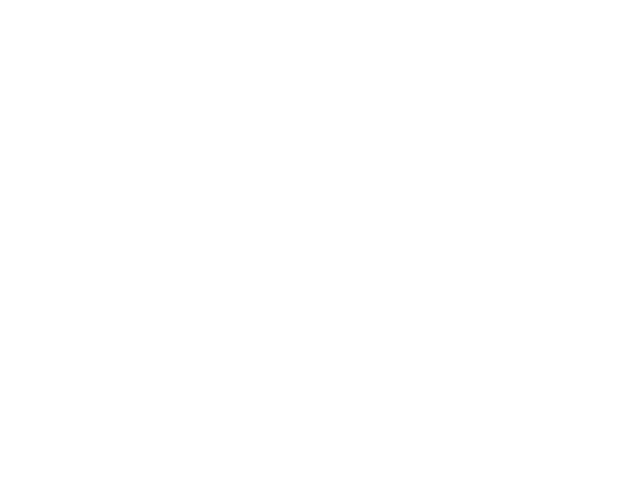

Homogeneity since k =  1059


<IPython.core.display.Javascript object>


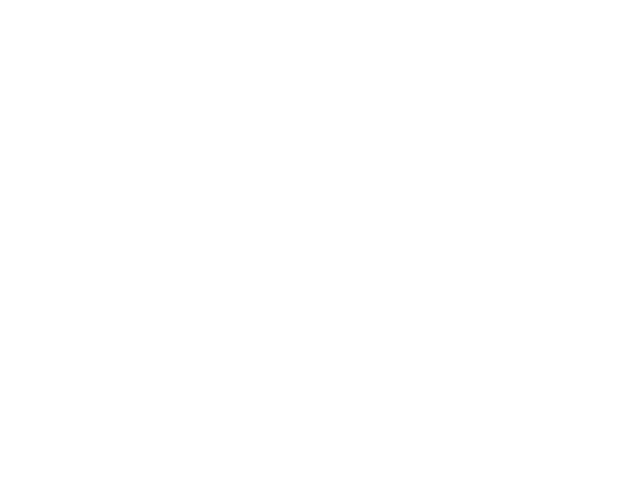

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


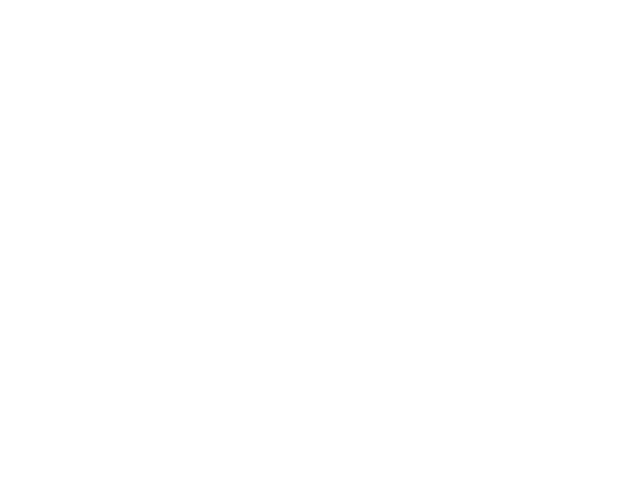

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04545455 0.04545455 ... 0.04545455 0.04545455 0.04545455]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


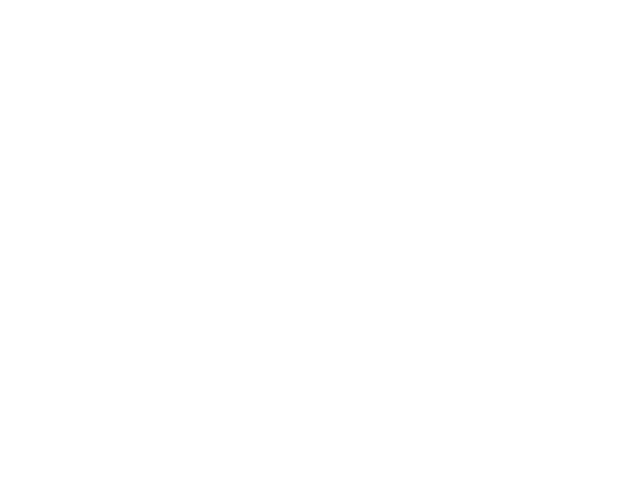

Homogeneity since k =  798


<IPython.core.display.Javascript object>


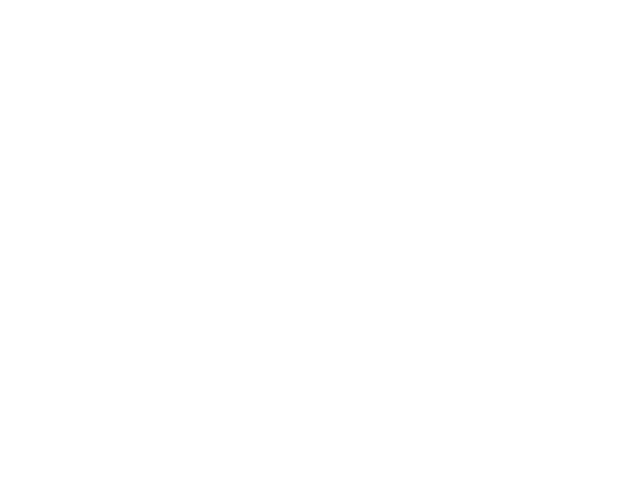

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


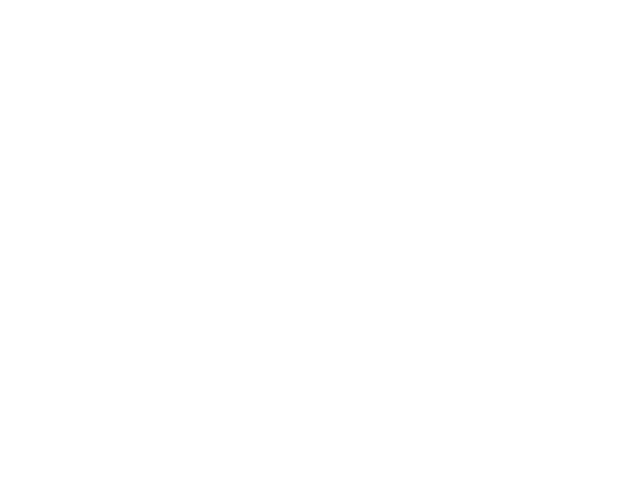

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.         0.04347826]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


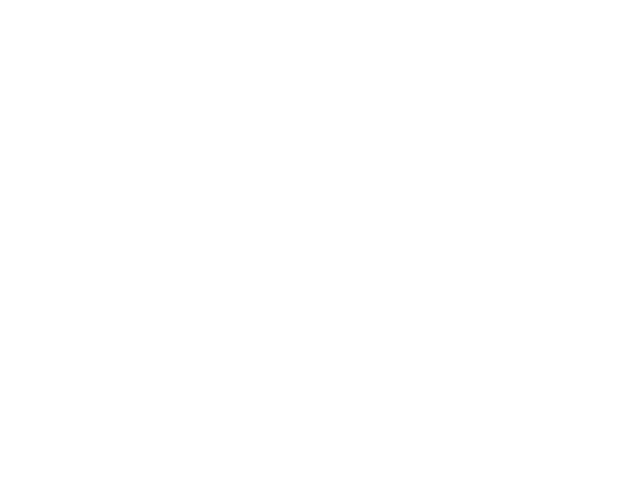

Homogeneity since k =  956


<IPython.core.display.Javascript object>


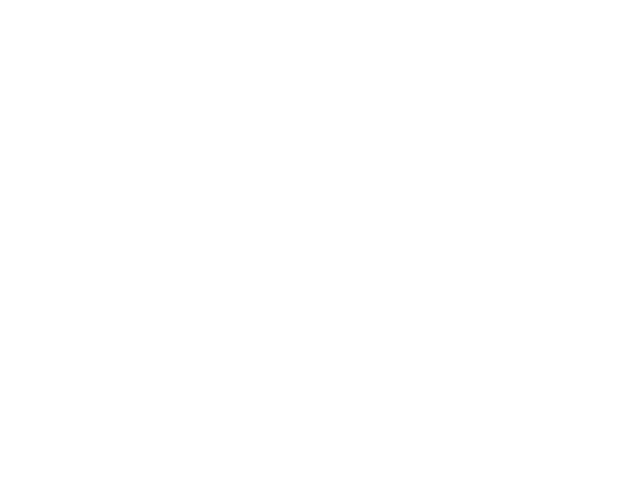

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


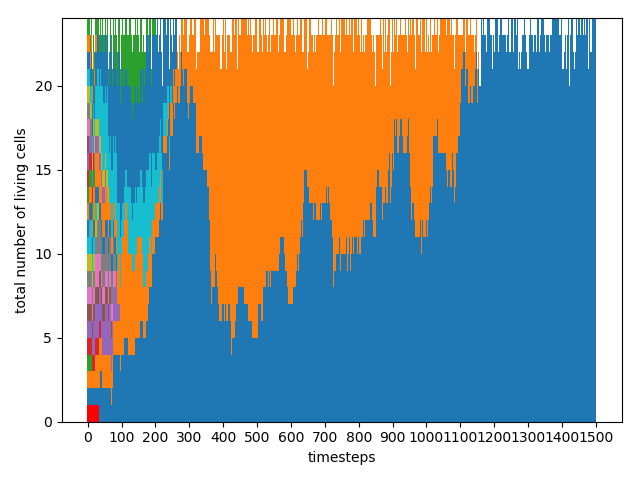

tmax 1501
val [[0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 [0.         0.04166667 0.04166667 ... 0.04166667 0.04166667 0.04166667]
 ...
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


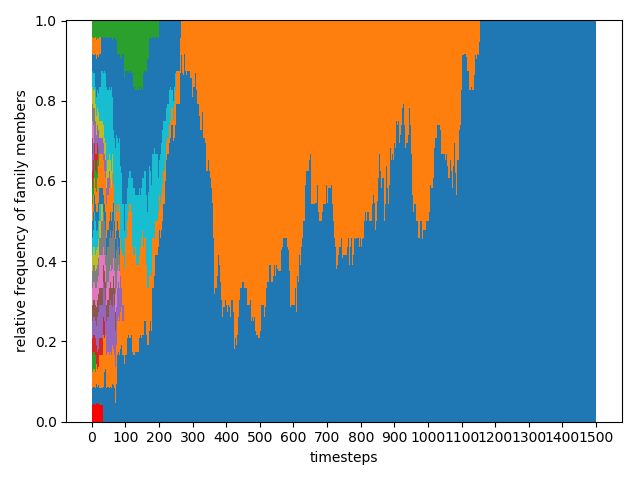

Homogeneity since k =  1156


<IPython.core.display.Javascript object>


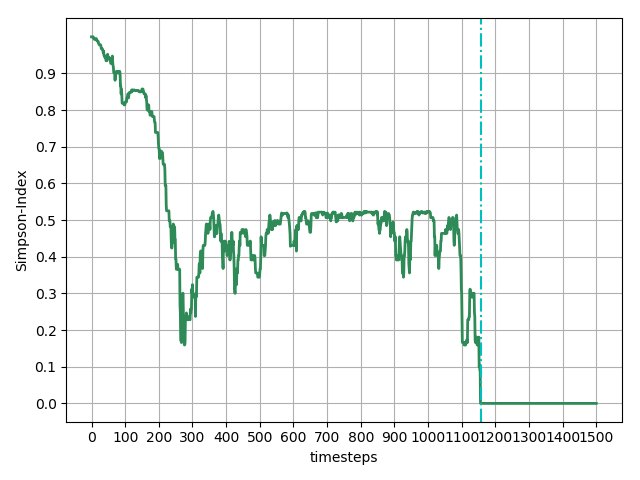

In [3]:
# for i in range(len(birthrate)):
#     lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance',\
#                density = dens, dims = dim, r_b = birthrate[i], variation = False, restchannels = rc ,r_d = deathrate)
for i in range(len(dim)):
    wdh=1
    while wdh <= 3:
        lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance', bc='reflecting',\
               density = dens, dims = dim[i], r_b = birthrate[0], variation = False, restchannels = rc[i] ,r_d = deathrate)
        id = str(dim[i]) + '_' + str(wdh)
        lgca.timeevo(timesteps, record=True)
        %matplotlib notebook
        bar_stacked(lgca, save = True, id = id)
        bar_stacked_relative(lgca, save = True, id = id)
        ana_si(lgca, p = True, save = True, id = id)
        save_data(lgca, id = id)
        wdh = wdh +1